In [1]:
from TextMiningProcesses import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


5    0.452013
1    0.267035
4    0.134377
3    0.077411
2    0.069163
Name: overall, dtype: float64

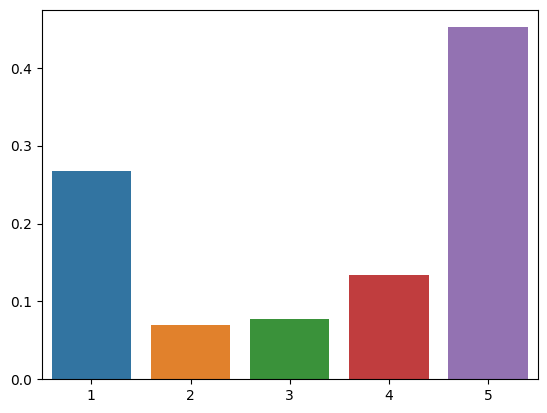

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(columns='overall')
y_train = train['overall']
X_test = test.drop(columns='overall')
y_test = test['overall']

normalized_counts = y_train.value_counts(normalize=True)

display(y_train.value_counts(normalize=True))

sns.barplot(x=normalized_counts.index, y = normalized_counts.values)
plt.show()

We can see that the data is not very well balanced and may wish to consider over or undersampling the data. from the size of the data it may be best to undersample.

In [3]:
"""
With two methods of tokenizing ands 2 methods of vectorizing the text fields, that gives us 4 potential cobinations to test the regression.
To test the regression we can use the LinearRegression model to check for a linear regression and we can use the crossvalidation to verify
any detected linear relationships.

First though we must identify and preprocess our 4 types of data

This cell could take a few minutes to run.
"""

# Lemmatized data
X_lem_train = column_lemmatizer(X_train['reviewText'])
X_lem_test = column_lemmatizer(X_test['reviewText'])

# Stemmatized data
X_stem_train = column_stemmatizer(X_train['reviewText'])
X_stem_test = column_stemmatizer(X_test['reviewText'])

# Lemmatized CountVectorized data
X_lem_CV_train, X_lem_CV_test = count_vectorize_data(X_lem_train, X_lem_test)

# Lemmatized TFIDFVectorized data
X_lem_RFID_train, X_lem_RFID_test = tfidf_vectorize_data(X_lem_train, X_lem_test)

# Stemmatized CountVectorized data
X_stem_CV_train, X_stem_CV_test = count_vectorize_data(X_stem_train, X_stem_test)

# Stemmatized TFIDFVectorized data
X_stem_RFID_train, X_stem_RFID_test = tfidf_vectorize_data(X_stem_train, X_stem_test)



# 1. Logistic Regression


In [4]:
# a) Lemmatized CountVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_lem_CV_train, y_train)
y_pred_train_logistic_lem_cv = logistic_model.predict(X_lem_CV_train)
y_pred_test_logistic_lem_cv = logistic_model.predict(X_lem_CV_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_lem_cv)
logistic_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_lem_cv)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_lem_cv = accuracy_score(y_train, y_pred_train_logistic_lem_cv)
accuracy_test_logistic_lem_cv = accuracy_score(y_test, y_pred_test_logistic_lem_cv)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:\n", logistic_report_train_lem_cv_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:\n", logistic_report_test_lem_cv_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_logistic_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_logistic_lem_cv)



Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.88      0.95      0.95      0.91      0.95      0.90     11494
          2       0.95      0.66      1.00      0.78      0.81      0.63      2977
          3       0.92      0.71      0.99      0.80      0.84      0.68      3332
          4       0.90      0.67      0.99      0.77      0.81      0.64      5784
          5       0.87      0.97      0.88      0.92      0.92      0.86     19456

avg / total       0.88      0.88      0.93      0.88      0.90      0.81     43043


Logistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.69      0.76      0.88      0.72      0.82      0.66      4774
          2       0.21      0.14      0.96      0.17      0.37      0.13      1276
      

In [5]:
# b) Lemmatized TFIDFVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_lem_RFID_train, y_train)
y_pred_train_logistic_lem_rfid = logistic_model.predict(X_lem_RFID_train)
y_pred_test_logistic_lem_rfid = logistic_model.predict(X_lem_RFID_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_lem_rfid)
logistic_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_lem_rfid)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_lem_rfid = accuracy_score(y_train, y_pred_train_logistic_lem_rfid)
accuracy_test_logistic_lem_rfid = accuracy_score(y_test, y_pred_test_logistic_lem_rfid)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", logistic_report_train_lem_rfid_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", logistic_report_test_lem_rfid_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_logistic_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_logistic_lem_rfid)

Logistic Regression - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.74      0.90      0.89      0.81      0.89      0.80     11494
          2       0.77      0.11      1.00      0.20      0.34      0.10      2977
          3       0.69      0.24      0.99      0.36      0.49      0.22      3332
          4       0.64      0.35      0.97      0.46      0.59      0.32      5784
          5       0.75      0.94      0.75      0.84      0.84      0.72     19456

avg / total       0.73      0.74      0.85      0.70      0.76      0.61     43043


Logistic Regression - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.84      0.86      0.75      0.85      0.72      4774
          2       0.33      0.04      0.99      0.06      0.19      0.03      1276


In [6]:
# c) Stemmatized CountVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_stem_CV_train, y_train)
y_pred_train_logistic_stem_cv = logistic_model.predict(X_stem_CV_train)
y_pred_test_logistic_stem_cv = logistic_model.predict(X_stem_CV_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_stem_cv)
logistic_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_stem_cv)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_stem_cv = accuracy_score(y_train, y_pred_train_logistic_stem_cv)
accuracy_test_logistic_stem_cv = accuracy_score(y_test, y_pred_test_logistic_stem_cv)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (stem_cv) - imbalanced:\n", logistic_report_train_stem_cv_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (stem_cv) - imbalanced:\n", logistic_report_test_stem_cv_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_logistic_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_logistic_stem_cv)

Logistic Regression - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.84      0.92      0.94      0.88      0.93      0.86     11494
          2       0.91      0.55      1.00      0.68      0.74      0.52      2977
          3       0.86      0.61      0.99      0.71      0.78      0.58      3332
          4       0.84      0.60      0.98      0.70      0.77      0.56      5784
          5       0.84      0.96      0.85      0.90      0.90      0.82     19456

avg / total       0.85      0.84      0.91      0.84      0.87      0.76     43043


Logistic Regression - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.77      0.87      0.72      0.82      0.67      4774
          2       0.23      0.14      0.97      0.17      0.36      0.12      1276
    

In [7]:
# d) Stemmatized TFIDFVectorized data

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_stem_RFID_train, y_train)
y_pred_train_logistic_stem_rfid = logistic_model.predict(X_stem_RFID_train)
y_pred_test_logistic_stem_rfid = logistic_model.predict(X_stem_RFID_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_stem_rfid)
logistic_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_stem_rfid)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_stem_rfid = accuracy_score(y_train, y_pred_train_logistic_stem_rfid)
accuracy_test_logistic_stem_rfid = accuracy_score(y_test, y_pred_test_logistic_stem_rfid)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", logistic_report_train_stem_rfid_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", logistic_report_test_stem_rfid_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_logistic_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_logistic_stem_rfid)

Logistic Regression - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.73      0.88      0.88      0.80      0.88      0.78     11494
          2       0.69      0.10      1.00      0.18      0.32      0.09      2977
          3       0.63      0.23      0.99      0.33      0.47      0.21      3332
          4       0.62      0.33      0.97      0.43      0.57      0.30      5784
          5       0.75      0.94      0.74      0.83      0.83      0.70     19456

avg / total       0.71      0.73      0.84      0.68      0.75      0.59     43043


Logistic Regression - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.83      0.86      0.74      0.85      0.71      4774
          2       0.35      0.04      0.99      0.08      0.21      0.04      127

## Summary - Logistic Regression

In [8]:
# a) Lemmatized CountVectorized data
logistic_report_train_lem_cv_imbalanced_last = [accuracy_train_logistic_lem_cv*100] + [float(value) for value in logistic_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
logistic_report_test_lem_cv_imbalanced_last = [accuracy_test_logistic_lem_cv*100] + [float(value) for value in logistic_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_lem_cv_imbalanced = pd.DataFrame([logistic_report_train_lem_cv_imbalanced_last, logistic_report_test_lem_cv_imbalanced_last], columns=column_names)
final_logistic_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_logistic_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_logistic_report_lem_cv_imbalanced = final_logistic_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
logistic_report_train_lem_rfid_imbalanced_last = [accuracy_train_logistic_lem_rfid*100] + [float(value) for value in logistic_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_lem_rfid_imbalanced_last = [accuracy_test_logistic_lem_rfid*100] + [float(value) for value in logistic_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_lem_rfid_imbalanced = pd.DataFrame([logistic_report_train_lem_rfid_imbalanced_last, logistic_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_logistic_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_logistic_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_logistic_report_lem_rfid_imbalanced = final_logistic_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
logistic_report_train_stem_cv_imbalanced_last = [accuracy_train_logistic_stem_cv*100] + [float(value) for value in logistic_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_stem_cv_imbalanced_last = [accuracy_test_logistic_stem_cv*100] + [float(value) for value in logistic_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_stem_cv_imbalanced = pd.DataFrame([logistic_report_train_stem_cv_imbalanced_last, logistic_report_test_stem_cv_imbalanced_last], columns=column_names)
final_logistic_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_logistic_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_logistic_report_stem_cv_imbalanced = final_logistic_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
logistic_report_train_stem_rfid_imbalanced_last = [accuracy_train_logistic_stem_rfid*100]+ [float(value) for value in logistic_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_stem_rfid_imbalanced_last = [accuracy_test_logistic_stem_rfid*100] + [float(value) for value in logistic_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_stem_rfid_imbalanced = pd.DataFrame([logistic_report_train_stem_rfid_imbalanced_last, logistic_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_logistic_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_logistic_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_logistic_report_stem_rfid_imbalanced = final_logistic_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Logistic Regression

In [9]:
final_logistic_report = pd.concat([final_logistic_report_lem_cv_imbalanced,
                    final_logistic_report_lem_rfid_imbalanced,
                    final_logistic_report_stem_cv_imbalanced,
                    final_logistic_report_stem_rfid_imbalanced])

final_logistic_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,88.111888,0.88,0.88,0.93,0.88,0.90,0.81,43043.0
Lemmatized Count Vectorized,Test,63.544208,0.60,0.64,0.84,0.61,0.70,0.51,18447.0
Lemmatized TFIDF Vectorized,Train,74.049207,0.73,0.74,0.85,0.70,0.76,0.61,43043.0
Lemmatized TFIDF Vectorized,Test,66.872662,0.61,0.67,0.82,0.61,0.68,0.51,18447.0
Stemmatized Count Vectorized,Train,84.448110,0.85,0.84,0.91,0.84,0.87,0.76,43043.0
Stemmatized Count Vectorized,Test,63.885727,0.60,0.64,0.84,0.61,0.70,0.51,18447.0
Stemmatized TFIDF Vectorized,Train,72.783031,0.71,0.73,0.84,0.68,0.75,0.59,43043.0
Stemmatized TFIDF Vectorized,Test,66.504039,0.61,0.67,0.82,0.61,0.68,0.51,18447.0


### Confusion Matrix for Logistic Regression

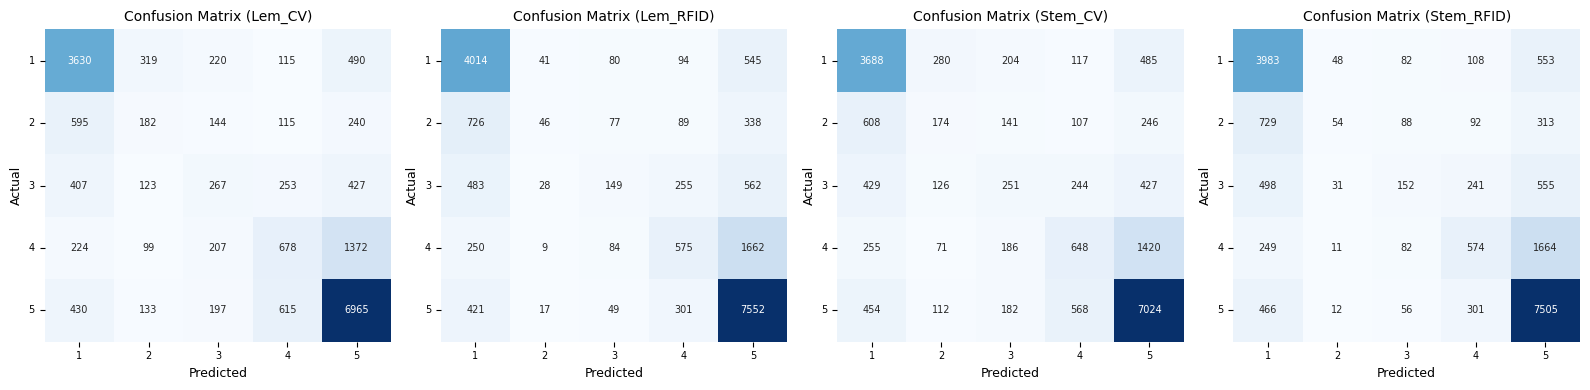

Lem_CV: Train Accuracy - 0.8811, Test Accuracy - 0.6354
Stem_CV: Train Accuracy - 0.8445, Test Accuracy - 0.6389
Lem_TFIDF: Train Accuracy - 0.7405, Test Accuracy - 0.6687
Stem_TFIDF: Train Accuracy - 0.7278, Test Accuracy - 0.6650


In [10]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_logistic_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_logistic_lem_cv, 'Test': accuracy_test_logistic_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_logistic_lem_rfid, 'Test': accuracy_test_logistic_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_logistic_stem_cv, 'Test': accuracy_test_logistic_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_logistic_stem_rfid, 'Test': accuracy_test_logistic_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 2. Support Vector Machine (SVM)

In [11]:
# a) Lemmatized CountVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_lem_CV_train, y_train)
y_pred_train_svm_lem_cv = svm_model.predict(X_lem_CV_train)
y_pred_test_svm_lem_cv = svm_model.predict(X_lem_CV_test)

# SVM classification reports and accuracy scores
svm_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_lem_cv)
svm_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_lem_cv)
accuracy_train_svm_lem_cv = accuracy_score(y_train, y_pred_train_svm_lem_cv)
accuracy_test_svm_lem_cv = accuracy_score(y_test, y_pred_test_svm_lem_cv)

# Print results
print("SVM - Classification Report: Train Data (lem_cv) - imbalanced:\n", svm_report_train_lem_cv_imbalanced)
print("\nSVM - Classification Report: Test Data (lem_cv) - imbalanced:\n", svm_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_svm_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_svm_lem_cv)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.77      0.92      0.90      0.84      0.91      0.83     11494
          2       1.00      0.28      1.00      0.44      0.53      0.26      2977
          3       0.94      0.40      1.00      0.56      0.63      0.37      3332
          4       0.90      0.50      0.99      0.64      0.70      0.47      5784
          5       0.79      0.97      0.79      0.88      0.88      0.79     19456

avg / total       0.83      0.80      0.88      0.78      0.82      0.69     43043


SVM - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.84      0.83      0.72      0.84      0.70      4774
          2       0.58      0.01      1.00      0.01      0.07      0.00      1276
          3       0.35      0.04      

In [12]:
# b) Lemmatized TFIDFVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_lem_RFID_train, y_train)
y_pred_train_svm_lem_rfid = svm_model.predict(X_lem_RFID_train)
y_pred_test_svm_lem_rfid = svm_model.predict(X_lem_RFID_test)

# SVM classification reports and accuracy scores
svm_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_lem_rfid)
svm_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_lem_rfid)
accuracy_train_svm_lem_rfid = accuracy_score(y_train, y_pred_train_svm_lem_rfid)
accuracy_test_svm_lem_rfid = accuracy_score(y_test, y_pred_test_svm_lem_rfid)

# Print results
print("SVM - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", svm_report_train_lem_rfid_imbalanced)
print("\nSVM - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", svm_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_svm_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_svm_lem_rfid)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.87      0.98      0.95      0.92      0.96      0.93     11494
          2       1.00      0.53      1.00      0.69      0.73      0.50      2977
          3       0.98      0.71      1.00      0.82      0.84      0.68      3332
          4       0.96      0.90      0.99      0.93      0.95      0.89      5784
          5       0.94      0.99      0.95      0.96      0.97      0.94     19456

avg / total       0.93      0.92      0.96      0.92      0.94      0.88     43043


SVM - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.86      0.85      0.75      0.86      0.73      4774
          2       0.57      0.01      1.00      0.02      0.10      0.01      1276
          3       0.40      0.07

In [13]:
# c) Stemmatized CountVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_stem_CV_train, y_train)
y_pred_train_svm_stem_cv = svm_model.predict(X_stem_CV_train)
y_pred_test_svm_stem_cv = svm_model.predict(X_stem_CV_test)

# SVM classification reports and accuracy scores
svm_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_stem_cv)
svm_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_stem_cv)
accuracy_train_svm_stem_cv = accuracy_score(y_train, y_pred_train_svm_stem_cv)
accuracy_test_svm_stem_cv = accuracy_score(y_test, y_pred_test_svm_stem_cv)

# Print results
print("SVM - Classification Report: Train Data (stem_cv) - imbalanced:\n", svm_report_train_stem_cv_imbalanced)
print("\nSVM - Classification Report: Test Data (stem_cv) - imbalanced:\n", svm_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_svm_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_svm_stem_cv)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.92      0.90      0.83      0.91      0.82     11494
          2       1.00      0.26      1.00      0.41      0.51      0.24      2977
          3       0.94      0.38      1.00      0.54      0.62      0.36      3332
          4       0.89      0.48      0.99      0.63      0.69      0.45      5784
          5       0.79      0.97      0.78      0.87      0.87      0.77     19456

avg / total       0.82      0.79      0.87      0.77      0.81      0.67     43043


SVM - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.84      0.83      0.72      0.83      0.70      4774
          2       0.46      0.00      1.00      0.01      0.07      0.00      1276
          3       0.34      0.04    

In [14]:
# d) Stemmatized TFIDFVectorized data

# SVM model
svm_model = SVC(max_iter=5000)
svm_model.fit(X_stem_RFID_train, y_train)
y_pred_train_svm_stem_rfid = svm_model.predict(X_stem_RFID_train)
y_pred_test_svm_stem_rfid = svm_model.predict(X_stem_RFID_test)

# SVM classification reports and accuracy scores
svm_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_stem_rfid)
svm_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_stem_rfid)
accuracy_train_svm_stem_rfid = accuracy_score(y_train, y_pred_train_svm_stem_rfid)
accuracy_test_svm_stem_rfid = accuracy_score(y_test, y_pred_test_svm_stem_rfid)

# Print results
print("SVM - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", svm_report_train_stem_rfid_imbalanced)
print("\nSVM - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", svm_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_svm_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_svm_stem_rfid)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVM - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.85      0.98      0.94      0.91      0.96      0.92     11494
          2       1.00      0.45      1.00      0.62      0.67      0.43      2977
          3       0.98      0.65      1.00      0.78      0.81      0.63      3332
          4       0.95      0.87      0.99      0.91      0.93      0.86      5784
          5       0.92      0.99      0.93      0.96      0.96      0.93     19456

avg / total       0.92      0.91      0.95      0.90      0.92      0.86     43043


SVM - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.86      0.85      0.75      0.85      0.73      4774
          2       0.78      0.01      1.00      0.02      0.10      0.01      1276
          3       0.45      0.

## Summary - Support Vector Machine

In [15]:
# a) Lemmatized CountVectorized data
svm_report_train_lem_cv_imbalanced_last = [accuracy_train_svm_lem_cv*100] + [float(value) for value in svm_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
svm_report_test_lem_cv_imbalanced_last = [accuracy_test_svm_lem_cv*100] + [float(value) for value in svm_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_lem_cv_imbalanced = pd.DataFrame([svm_report_train_lem_cv_imbalanced_last, svm_report_test_lem_cv_imbalanced_last], columns=column_names)
final_svm_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_svm_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_svm_report_lem_cv_imbalanced = final_svm_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
svm_report_train_lem_rfid_imbalanced_last = [accuracy_train_svm_lem_rfid*100] + [float(value) for value in svm_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_lem_rfid_imbalanced_last = [accuracy_test_svm_lem_rfid*100] + [float(value) for value in svm_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_lem_rfid_imbalanced = pd.DataFrame([svm_report_train_lem_rfid_imbalanced_last, svm_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_svm_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_svm_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_svm_report_lem_rfid_imbalanced = final_svm_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
svm_report_train_stem_cv_imbalanced_last = [accuracy_train_svm_stem_cv*100] + [float(value) for value in svm_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_stem_cv_imbalanced_last = [accuracy_test_svm_stem_cv*100] + [float(value) for value in svm_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_stem_cv_imbalanced = pd.DataFrame([svm_report_train_stem_cv_imbalanced_last, svm_report_test_stem_cv_imbalanced_last], columns=column_names)
final_svm_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_svm_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_svm_report_stem_cv_imbalanced = final_svm_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
svm_report_train_stem_rfid_imbalanced_last = [accuracy_train_svm_stem_rfid*100]+ [float(value) for value in svm_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_stem_rfid_imbalanced_last = [accuracy_test_svm_stem_rfid*100] + [float(value) for value in svm_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_stem_rfid_imbalanced = pd.DataFrame([svm_report_train_stem_rfid_imbalanced_last, svm_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_svm_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_svm_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_svm_report_stem_rfid_imbalanced = final_svm_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for Support Vector Machine (SVM)

In [16]:
final_svm_report = pd.concat([final_svm_report_lem_cv_imbalanced,
                    final_svm_report_lem_rfid_imbalanced,
                    final_svm_report_stem_cv_imbalanced,
                    final_svm_report_stem_rfid_imbalanced])

final_svm_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,80.347559,0.83,0.80,0.88,0.78,0.82,0.69,43043.0
Lemmatized Count Vectorized,Test,65.208435,0.61,0.65,0.80,0.58,0.65,0.48,18447.0
Lemmatized TFIDF Vectorized,Train,92.379713,0.93,0.92,0.96,0.92,0.94,0.88,43043.0
Lemmatized TFIDF Vectorized,Test,67.002765,0.63,0.67,0.82,0.61,0.68,0.52,18447.0
Stemmatized Count Vectorized,Train,79.494924,0.82,0.79,0.87,0.77,0.81,0.67,43043.0
Stemmatized Count Vectorized,Test,64.975335,0.60,0.65,0.80,0.58,0.64,0.48,18447.0
Stemmatized TFIDF Vectorized,Train,90.930000,0.92,0.91,0.95,0.90,0.92,0.86,43043.0
Stemmatized TFIDF Vectorized,Test,67.127446,0.64,0.67,0.82,0.61,0.68,0.52,18447.0


### Confusion Matrix for Support Vector Machine (SVM)

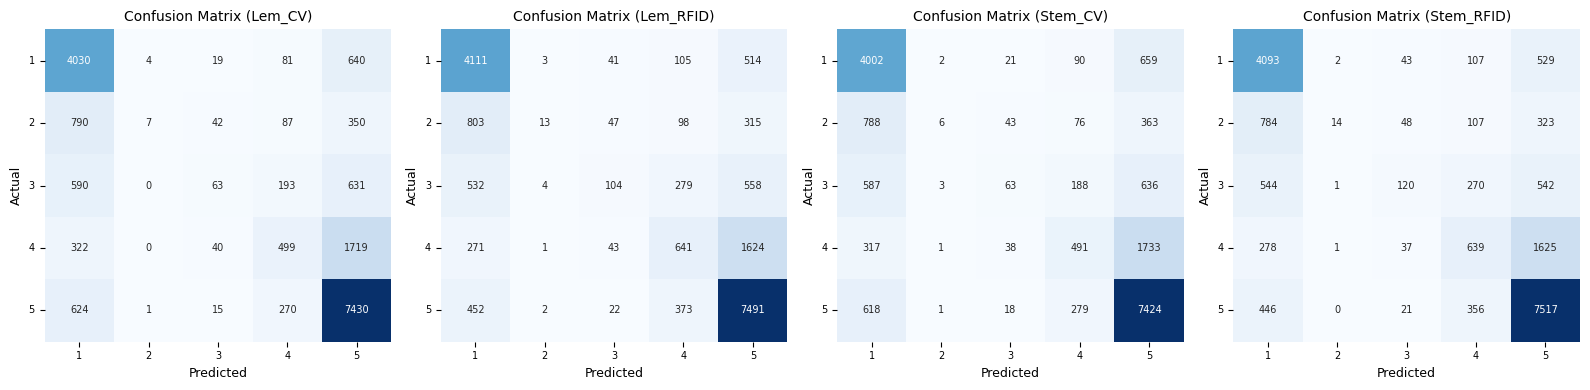

Lem_TFIDF: Train Accuracy - 0.9238, Test Accuracy - 0.6700
Stem_TFIDF: Train Accuracy - 0.9093, Test Accuracy - 0.6713
Lem_CV: Train Accuracy - 0.8035, Test Accuracy - 0.6521
Stem_CV: Train Accuracy - 0.7949, Test Accuracy - 0.6498


In [17]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_svm_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_svm_lem_cv, 'Test': accuracy_test_svm_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_svm_lem_rfid, 'Test': accuracy_test_svm_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_svm_stem_cv, 'Test': accuracy_test_svm_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_svm_stem_rfid, 'Test': accuracy_test_svm_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 3. k-Nearest Neighbors (kNN)

In [18]:
# a) KNN on Lemmatized CountVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_lem_CV_train, y_train)

y_pred_train_knn_lem_cv = knn_model.predict(X_lem_CV_train)
y_pred_test_knn_lem_cv = knn_model.predict(X_lem_CV_test)

knn_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_lem_cv)
knn_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_lem_cv)

accuracy_train_knn_lem_cv = accuracy_score(y_train, y_pred_train_knn_lem_cv)
accuracy_test_knn_lem_cv = accuracy_score(y_test, y_pred_test_knn_lem_cv)

print("KNN - Classification Report: Train Data (lem_cv) - imbalanced:\n", knn_report_train_lem_cv_imbalanced)
print("\nKNN - Classification Report: Test Data (lem_cv) - imbalanced:\n", knn_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_knn_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_knn_lem_cv)

KNN - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.61      0.77      0.82      0.68      0.80      0.63     11494
          2       0.58      0.13      0.99      0.22      0.36      0.12      2977
          3       0.54      0.17      0.99      0.26      0.41      0.15      3332
          4       0.55      0.23      0.97      0.33      0.48      0.21      5784
          5       0.68      0.85      0.67      0.76      0.75      0.58     19456

avg / total       0.63      0.64      0.80      0.60      0.67      0.48     43043


KNN - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.49      0.61      0.78      0.55      0.69      0.47      4774
          2       0.11      0.02      0.99      0.03      0.14      0.02      1276
          3       0.14      0.04      

In [19]:
# b) KNN on Lemmatized TFIDFVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_lem_RFID_train, y_train)

y_pred_train_knn_lem_rfid = knn_model.predict(X_lem_RFID_train)
y_pred_test_knn_lem_rfid = knn_model.predict(X_lem_RFID_test)

knn_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_lem_rfid)
knn_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_lem_rfid)

accuracy_train_knn_lem_rfid = accuracy_score(y_train, y_pred_train_knn_lem_rfid)
accuracy_test_knn_lem_rfid = accuracy_score(y_test, y_pred_test_knn_lem_rfid)

print("KNN - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", knn_report_train_lem_rfid_imbalanced)
print("\nKNN - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", knn_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_knn_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_knn_lem_rfid)

KNN - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.45      0.99      0.56      0.62      0.75      0.58     11494
          2       0.69      0.01      1.00      0.02      0.10      0.01      2977
          3       0.94      0.39      1.00      0.55      0.63      0.37      3332
          4       0.74      0.02      1.00      0.04      0.15      0.02      5784
          5       0.77      0.65      0.84      0.70      0.74      0.53     19456

avg / total       0.69      0.59      0.81      0.53      0.61      0.43     43043


KNN - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.27      0.97      0.10      0.43      0.31      0.11      4774
          2       0.05      0.00      1.00      0.00      0.03      0.00      1276
          3       0.23      0.01

In [20]:
# c) KNN on Stemmatized CountVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_stem_CV_train, y_train)

y_pred_train_knn_stem_cv = knn_model.predict(X_stem_CV_train)
y_pred_test_knn_stem_cv = knn_model.predict(X_stem_CV_test)

knn_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_stem_cv)
knn_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_stem_cv)

accuracy_train_knn_stem_cv = accuracy_score(y_train, y_pred_train_knn_stem_cv)
accuracy_test_knn_stem_cv = accuracy_score(y_test, y_pred_test_knn_stem_cv)

print("KNN - Classification Report: Train Data (stem_cv) - imbalanced:\n", knn_report_train_stem_cv_imbalanced)
print("\nKNN - Classification Report: Test Data (stem_cv) - imbalanced:\n", knn_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_knn_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_knn_stem_cv)

KNN - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.77      0.83      0.69      0.80      0.64     11494
          2       0.60      0.14      0.99      0.23      0.38      0.13      2977
          3       0.54      0.18      0.99      0.27      0.42      0.16      3332
          4       0.56      0.24      0.97      0.34      0.49      0.22      5784
          5       0.68      0.86      0.67      0.76      0.76      0.59     19456

avg / total       0.63      0.65      0.80      0.61      0.68      0.49     43043


KNN - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.61      0.79      0.55      0.69      0.47      4774
          2       0.13      0.03      0.99      0.04      0.16      0.02      1276
          3       0.15      0.04    

In [21]:
# d) KNN on Stemmatized TFIDFVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_stem_RFID_train, y_train)

y_pred_train_knn_stem_rfid = knn_model.predict(X_stem_RFID_train)
y_pred_test_knn_stem_rfid = knn_model.predict(X_stem_RFID_test)

knn_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_stem_rfid)
knn_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_stem_rfid)

accuracy_train_knn_stem_rfid = accuracy_score(y_train, y_pred_train_knn_stem_rfid)
accuracy_test_knn_stem_rfid = accuracy_score(y_test, y_pred_test_knn_stem_rfid)

print("KNN - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", knn_report_train_stem_rfid_imbalanced)
print("\nKNN - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", knn_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_knn_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_knn_stem_rfid)

KNN - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.46      0.98      0.57      0.62      0.75      0.59     11494
          2       0.65      0.01      1.00      0.03      0.12      0.01      2977
          3       0.91      0.39      1.00      0.55      0.63      0.37      3332
          4       0.72      0.03      1.00      0.06      0.17      0.03      5784
          5       0.77      0.65      0.83      0.70      0.74      0.53     19456

avg / total       0.68      0.59      0.81      0.54      0.61      0.43     43043


KNN - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.28      0.95      0.13      0.43      0.36      0.14      4774
          2       0.07      0.00      1.00      0.00      0.04      0.00      1276
          3       0.23      0.

## Summary - k-Nearest Neighbors

In [22]:
# a) Lemmatized CountVectorized data
knn_report_train_lem_cv_imbalanced_last = [accuracy_train_knn_lem_cv*100] + [float(value) for value in knn_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
knn_report_test_lem_cv_imbalanced_last = [accuracy_test_knn_lem_cv*100] + [float(value) for value in knn_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_lem_cv_imbalanced = pd.DataFrame([knn_report_train_lem_cv_imbalanced_last, knn_report_test_lem_cv_imbalanced_last], columns=column_names)
final_knn_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_knn_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_knn_report_lem_cv_imbalanced = final_knn_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
knn_report_train_lem_rfid_imbalanced_last = [accuracy_train_knn_lem_rfid*100] + [float(value) for value in knn_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_lem_rfid_imbalanced_last = [accuracy_test_knn_lem_rfid*100] + [float(value) for value in knn_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_lem_rfid_imbalanced = pd.DataFrame([knn_report_train_lem_rfid_imbalanced_last, knn_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_knn_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_knn_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_knn_report_lem_rfid_imbalanced = final_knn_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
knn_report_train_stem_cv_imbalanced_last = [accuracy_train_knn_stem_cv*100] + [float(value) for value in knn_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_stem_cv_imbalanced_last = [accuracy_test_knn_stem_cv*100] + [float(value) for value in knn_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_stem_cv_imbalanced = pd.DataFrame([knn_report_train_stem_cv_imbalanced_last, knn_report_test_stem_cv_imbalanced_last], columns=column_names)
final_knn_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_knn_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_knn_report_stem_cv_imbalanced = final_knn_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
knn_report_train_stem_rfid_imbalanced_last = [accuracy_train_knn_stem_rfid*100]+ [float(value) for value in knn_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_stem_rfid_imbalanced_last = [accuracy_test_knn_stem_rfid*100] + [float(value) for value in knn_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_stem_rfid_imbalanced = pd.DataFrame([knn_report_train_stem_rfid_imbalanced_last, knn_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_knn_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_knn_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_knn_report_stem_rfid_imbalanced = final_knn_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for k-Nearest Neighbors (kNN)

In [23]:
final_knn_report = pd.concat([final_knn_report_lem_cv_imbalanced,
                    final_knn_report_lem_rfid_imbalanced,
                    final_knn_report_stem_cv_imbalanced,
                    final_knn_report_stem_rfid_imbalanced])

final_knn_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,64.498292,0.63,0.64,0.80,0.60,0.67,0.48,43043.0
Lemmatized Count Vectorized,Test,51.970510,0.44,0.52,0.73,0.46,0.54,0.33,18447.0
Lemmatized TFIDF Vectorized,Train,58.906210,0.69,0.59,0.81,0.53,0.61,0.43,43043.0
Lemmatized TFIDF Vectorized,Test,30.557814,0.44,0.31,0.75,0.20,0.25,0.08,18447.0
Stemmatized Count Vectorized,Train,65.255675,0.63,0.65,0.80,0.61,0.68,0.49,43043.0
Stemmatized Count Vectorized,Test,52.431290,0.45,0.52,0.73,0.47,0.54,0.33,18447.0
Stemmatized TFIDF Vectorized,Train,59.210557,0.68,0.59,0.81,0.54,0.61,0.43,43043.0
Stemmatized TFIDF Vectorized,Test,31.804629,0.45,0.32,0.75,0.23,0.29,0.10,18447.0


### Confusion Matrix for k-Nearest Neighbors (kNN)

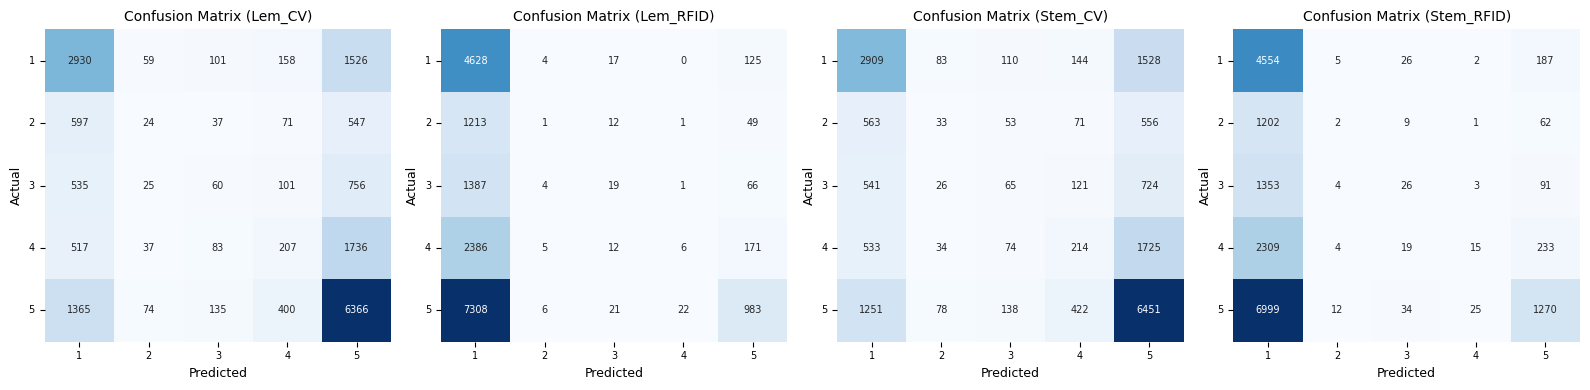

Stem_CV: Train Accuracy - 0.6526, Test Accuracy - 0.5243
Lem_CV: Train Accuracy - 0.6450, Test Accuracy - 0.5197
Stem_TFIDF: Train Accuracy - 0.5921, Test Accuracy - 0.3180
Lem_TFIDF: Train Accuracy - 0.5891, Test Accuracy - 0.3056


In [24]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_knn_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_knn_lem_cv, 'Test': accuracy_test_knn_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_knn_lem_rfid, 'Test': accuracy_test_knn_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_knn_stem_cv, 'Test': accuracy_test_knn_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_knn_stem_rfid, 'Test': accuracy_test_knn_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 4. Decision Tree Classifier

In [25]:
# a) Decision Tree on Lemmatized CountVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_lem_CV_train, y_train)
y_pred_train_dt_lem_cv = dt_model.predict(X_lem_CV_train)
y_pred_test_dt_lem_cv = dt_model.predict(X_lem_CV_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_lem_cv)
dt_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_lem_cv)
accuracy_train_dt_lem_cv = accuracy_score(y_train, y_pred_train_dt_lem_cv)
accuracy_test_dt_lem_cv = accuracy_score(y_test, y_pred_test_dt_lem_cv)

# Print results
print("Decision Tree - Classification Report: Train Data (lem_cv):\n", dt_report_train_lem_cv_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (lem_cv):\n", dt_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_dt_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_dt_lem_cv)

Decision Tree - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.57      0.61      0.84      0.59      0.72      0.50      4774
          2       0.14      0.11      0.95      0.12      0.32      0.10      1276
          3       0.16      0.13      0.94  

In [26]:
# b) Decision Tree on Lemmatized TFIDFVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_lem_RFID_train, y_train)
y_pred_train_dt_lem_rfid = dt_model.predict(X_lem_RFID_train)
y_pred_test_dt_lem_rfid = dt_model.predict(X_lem_RFID_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_lem_rfid)
dt_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_lem_rfid)
accuracy_train_dt_lem_rfid = accuracy_score(y_train, y_pred_train_dt_lem_rfid)
accuracy_test_dt_lem_rfid = accuracy_score(y_test, y_pred_test_dt_lem_rfid)

# Print results
print("Decision Tree - Classification Report: Train Data (lem_tfidf):\n", dt_report_train_lem_rfid_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (lem_tfidf):\n", dt_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_dt_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_dt_lem_rfid)

Decision Tree - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.59      0.84      0.57      0.70      0.48      4774
          2       0.13      0.10      0.95      0.12      0.31      0.09      1276
          3       0.14      0.11      

In [27]:
# c) Decision Tree on Stemmatized CountVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_stem_CV_train, y_train)
y_pred_train_dt_stem_cv = dt_model.predict(X_stem_CV_train)
y_pred_test_dt_stem_cv = dt_model.predict(X_stem_CV_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_stem_cv)
dt_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_stem_cv)
accuracy_train_dt_stem_cv = accuracy_score(y_train, y_pred_train_dt_stem_cv)
accuracy_test_dt_stem_cv = accuracy_score(y_test, y_pred_test_dt_stem_cv)

# Print results
print("Decision Tree - Classification Report: Train Data (stem_cv):\n", dt_report_train_stem_cv_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (stem_cv):\n", dt_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_dt_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_dt_stem_cv)

Decision Tree - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.57      0.60      0.84      0.58      0.71      0.49      4774
          2       0.15      0.12      0.95      0.13      0.34      0.11      1276
          3       0.16      0.13      0.94

In [28]:
# d) Decision Tree on Lemmatized TFIDFVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_stem_RFID_train, y_train)
y_pred_train_dt_stem_rfid = dt_model.predict(X_stem_RFID_train)
y_pred_test_dt_stem_rfid = dt_model.predict(X_stem_RFID_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_stem_rfid)
dt_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_stem_rfid)
accuracy_train_dt_stem_rfid = accuracy_score(y_train, y_pred_train_dt_stem_rfid)
accuracy_test_dt_stem_rfid = accuracy_score(y_test, y_pred_test_dt_stem_rfid)

# Print results
print("Decision Tree - Classification Report: Train Data (stem_tfidf):\n", dt_report_train_stem_rfid_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (stem_tfidf):\n", dt_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_dt_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_dt_stem_rfid)

Decision Tree - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.55      0.59      0.83      0.57      0.70      0.48      4774
          2       0.12      0.10      0.95      0.11      0.31      0.09      1276
          3       0.14      0.11    

## Summary - Decision Tree

In [29]:
# a) Lemmatized CountVectorized data
dt_report_train_lem_cv_imbalanced_last = [accuracy_train_dt_lem_cv*100] + [float(value) for value in dt_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
dt_report_test_lem_cv_imbalanced_last = [accuracy_test_dt_lem_cv*100] + [float(value) for value in dt_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_lem_cv_imbalanced = pd.DataFrame([dt_report_train_lem_cv_imbalanced_last, dt_report_test_lem_cv_imbalanced_last], columns=column_names)
final_dt_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_dt_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_dt_report_lem_cv_imbalanced = final_dt_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
dt_report_train_lem_rfid_imbalanced_last = [accuracy_train_dt_lem_rfid*100] + [float(value) for value in dt_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_lem_rfid_imbalanced_last = [accuracy_test_dt_lem_rfid*100] + [float(value) for value in dt_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_lem_rfid_imbalanced = pd.DataFrame([dt_report_train_lem_rfid_imbalanced_last, dt_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_dt_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_dt_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_dt_report_lem_rfid_imbalanced = final_dt_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
dt_report_train_stem_cv_imbalanced_last = [accuracy_train_dt_stem_cv*100] + [float(value) for value in dt_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_stem_cv_imbalanced_last = [accuracy_test_dt_stem_cv*100] + [float(value) for value in dt_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_stem_cv_imbalanced = pd.DataFrame([dt_report_train_stem_cv_imbalanced_last, dt_report_test_stem_cv_imbalanced_last], columns=column_names)
final_dt_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_dt_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_dt_report_stem_cv_imbalanced = final_dt_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
dt_report_train_stem_rfid_imbalanced_last = [accuracy_train_dt_stem_rfid*100]+ [float(value) for value in dt_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_stem_rfid_imbalanced_last = [accuracy_test_dt_stem_rfid*100] + [float(value) for value in dt_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_stem_rfid_imbalanced = pd.DataFrame([dt_report_train_stem_rfid_imbalanced_last, dt_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_dt_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_dt_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_dt_report_stem_rfid_imbalanced = final_dt_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Decision Tree

In [30]:
final_dt_report = pd.concat([final_dt_report_lem_cv_imbalanced,
                    final_dt_report_lem_rfid_imbalanced,
                    final_dt_report_stem_cv_imbalanced,
                    final_dt_report_stem_rfid_imbalanced])

final_dt_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,99.881514,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Lemmatized Count Vectorized,Test,51.948826,0.50,0.52,0.80,0.51,0.61,0.39,18447.0
Lemmatized TFIDF Vectorized,Train,99.881514,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Lemmatized TFIDF Vectorized,Test,51.059793,0.49,0.51,0.79,0.50,0.60,0.38,18447.0
Stemmatized Count Vectorized,Train,99.869898,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Stemmatized Count Vectorized,Test,51.927143,0.50,0.52,0.80,0.51,0.61,0.39,18447.0
Stemmatized TFIDF Vectorized,Train,99.869898,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Stemmatized TFIDF Vectorized,Test,50.739958,0.49,0.51,0.79,0.50,0.60,0.38,18447.0


### Confusion Matrix for Decision Tree

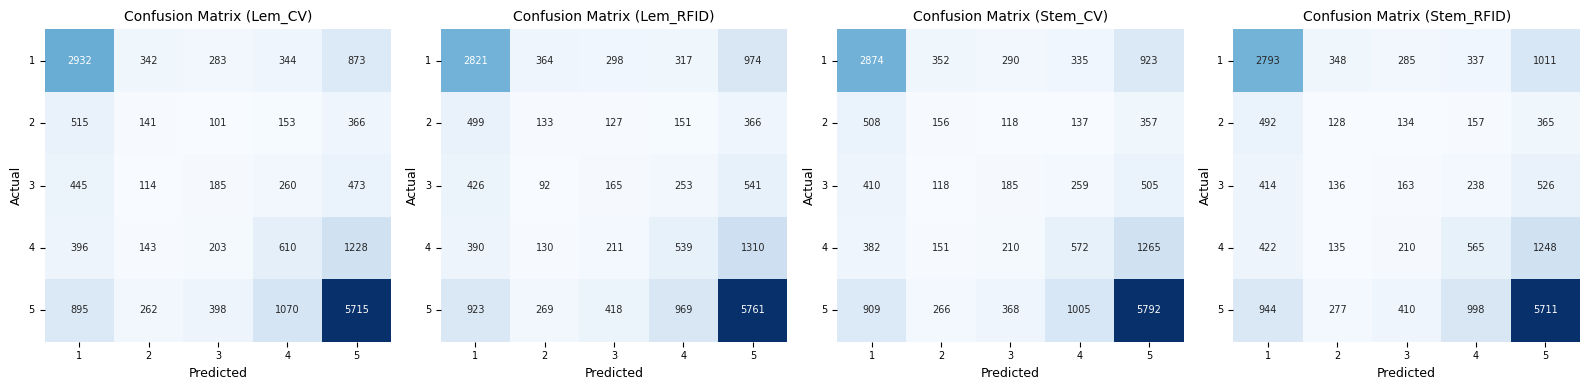

Lem_CV: Train Accuracy - 0.9988, Test Accuracy - 0.5195
Lem_TFIDF: Train Accuracy - 0.9988, Test Accuracy - 0.5106
Stem_CV: Train Accuracy - 0.9987, Test Accuracy - 0.5193
Stem_TFIDF: Train Accuracy - 0.9987, Test Accuracy - 0.5074


In [31]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_dt_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_dt_lem_cv, 'Test': accuracy_test_dt_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_dt_lem_rfid, 'Test': accuracy_test_dt_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_dt_stem_cv, 'Test': accuracy_test_dt_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_dt_stem_rfid, 'Test': accuracy_test_dt_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 5. Random Forest Classifier

In [32]:
# a) Random Forest on Lemmatized CountVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_lem_CV_train, y_train)
y_pred_train_rf_lem_cv = rf_model.predict(X_lem_CV_train)
y_pred_test_rf_lem_cv = rf_model.predict(X_lem_CV_test)

# Random Forest classification reports and accuracy scores
rf_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_lem_cv)
rf_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_lem_cv)
accuracy_train_rf_lem_cv = accuracy_score(y_train, y_pred_train_rf_lem_cv)
accuracy_test_rf_lem_cv = accuracy_score(y_test, y_pred_test_rf_lem_cv)

# Print results
print("Random Forest - Classification Report: Train Data (lem_cv):\n", rf_report_train_lem_cv_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_cv):\n", rf_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_rf_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_rf_lem_cv)


Random Forest - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      0.99      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.79      0.87      0.73      0.83      0.68      4774
          2       0.83      0.01      1.00      0.03      0.12      0.01      1276
          3       0.69      0.02      1.00  

In [33]:
# b) Random Forest on Lemmatized TFIDFVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_lem_RFID_train, y_train)
y_pred_train_rf_lem_rfid = rf_model.predict(X_lem_RFID_train)
y_pred_test_rf_lem_rfid = rf_model.predict(X_lem_RFID_test)

# Random Forest classification reports and accuracy scores
rf_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_lem_rfid)
rf_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_lem_rfid)
accuracy_train_rf_lem_rfid = accuracy_score(y_train, y_pred_train_rf_lem_rfid)
accuracy_test_rf_lem_rfid = accuracy_score(y_test, y_pred_test_rf_lem_rfid)

# Print results
print("Random Forest - Classification Report: Train Data (lem_tfidf):\n", rf_report_train_lem_rfid_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_tfidf):\n", rf_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_rf_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_rf_lem_rfid)

Random Forest - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.78      0.87      0.73      0.82      0.67      4774
          2       0.86      0.01      1.00      0.03      0.12      0.01      1276
          3       0.87      0.02      

In [34]:
# c) Random Forest on Stemmatized CountVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_stem_CV_train, y_train)
y_pred_train_rf_stem_cv = rf_model.predict(X_stem_CV_train)
y_pred_test_rf_stem_cv = rf_model.predict(X_stem_CV_test)

# Random Forest classification reports and accuracy scores
rf_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_stem_cv)
rf_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_stem_cv)
accuracy_train_rf_stem_cv = accuracy_score(y_train, y_pred_train_rf_stem_cv)
accuracy_test_rf_stem_cv = accuracy_score(y_test, y_pred_test_rf_stem_cv)

# Print results
print("Random Forest - Classification Report: Train Data (stem_cv):\n", rf_report_train_stem_cv_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (stem_cv):\n", rf_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_rf_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_rf_stem_cv)

Random Forest - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.78      0.87      0.72      0.82      0.67      4774
          2       0.79      0.01      1.00      0.03      0.12      0.01      1276
          3       0.76      0.02      1.00

In [35]:
# d) Random Forest on Stemmatized TFIDFVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_stem_RFID_train, y_train)
y_pred_train_rf_stem_rfid = rf_model.predict(X_stem_RFID_train)
y_pred_test_rf_stem_rfid = rf_model.predict(X_stem_RFID_test)

# Random Forest classification reports and accuracy scores
rf_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_stem_rfid)
rf_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_stem_rfid)
accuracy_train_rf_stem_rfid = accuracy_score(y_train, y_pred_train_rf_stem_rfid)
accuracy_test_rf_stem_rfid = accuracy_score(y_test, y_pred_test_rf_stem_rfid)

# Print results
print("Random Forest - Classification Report: Train Data (stem_tfidf):\n", rf_report_train_stem_rfid_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (stem_tfidf):\n", rf_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_rf_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_rf_stem_rfid)

Random Forest - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      0.99      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.77      0.87      0.72      0.82      0.67      4774
          2       0.81      0.01      1.00      0.03      0.12      0.01      1276
          3       0.79      0.02    

## Summary - Random Forest

In [36]:
# a) Lemmatized CountVectorized data
rf_report_train_lem_cv_imbalanced_last = [accuracy_train_rf_lem_cv*100] + [float(value) for value in rf_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
rf_report_test_lem_cv_imbalanced_last = [accuracy_test_rf_lem_cv*100] + [float(value) for value in rf_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_lem_cv_imbalanced = pd.DataFrame([rf_report_train_lem_cv_imbalanced_last, rf_report_test_lem_cv_imbalanced_last], columns=column_names)
final_rf_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_rf_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_rf_report_lem_cv_imbalanced = final_rf_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
rf_report_train_lem_rfid_imbalanced_last = [accuracy_train_rf_lem_rfid*100] + [float(value) for value in rf_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_lem_rfid_imbalanced_last = [accuracy_test_rf_lem_rfid*100] + [float(value) for value in rf_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_lem_rfid_imbalanced = pd.DataFrame([rf_report_train_lem_rfid_imbalanced_last, rf_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_rf_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_rf_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_rf_report_lem_rfid_imbalanced = final_rf_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
rf_report_train_stem_cv_imbalanced_last = [accuracy_train_rf_stem_cv*100] + [float(value) for value in rf_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_stem_cv_imbalanced_last = [accuracy_test_rf_stem_cv*100] + [float(value) for value in rf_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_stem_cv_imbalanced = pd.DataFrame([rf_report_train_stem_cv_imbalanced_last, rf_report_test_stem_cv_imbalanced_last], columns=column_names)
final_rf_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_rf_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_rf_report_stem_cv_imbalanced = final_rf_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
rf_report_train_stem_rfid_imbalanced_last = [accuracy_train_rf_stem_rfid*100]+ [float(value) for value in rf_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_stem_rfid_imbalanced_last = [accuracy_test_rf_stem_rfid*100] + [float(value) for value in rf_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_stem_rfid_imbalanced = pd.DataFrame([rf_report_train_stem_rfid_imbalanced_last, rf_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_rf_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_rf_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_rf_report_stem_rfid_imbalanced = final_rf_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for Random Forest

In [37]:
final_rf_report = pd.concat([final_rf_report_lem_cv_imbalanced,
                    final_rf_report_lem_rfid_imbalanced,
                    final_rf_report_stem_cv_imbalanced,
                    final_rf_report_stem_rfid_imbalanced])

final_rf_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,99.881514,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Lemmatized Count Vectorized,Test,63.934515,0.65,0.64,0.75,0.54,0.57,0.42,18447.0
Lemmatized TFIDF Vectorized,Train,99.881514,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Lemmatized TFIDF Vectorized,Test,63.690573,0.66,0.64,0.75,0.54,0.56,0.41,18447.0
Stemmatized Count Vectorized,Train,99.869898,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Stemmatized Count Vectorized,Test,63.663468,0.65,0.64,0.75,0.54,0.57,0.41,18447.0
Stemmatized TFIDF Vectorized,Train,99.869898,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Stemmatized TFIDF Vectorized,Test,63.717678,0.65,0.64,0.75,0.54,0.57,0.41,18447.0


### Confusion Matrix for Random Forest

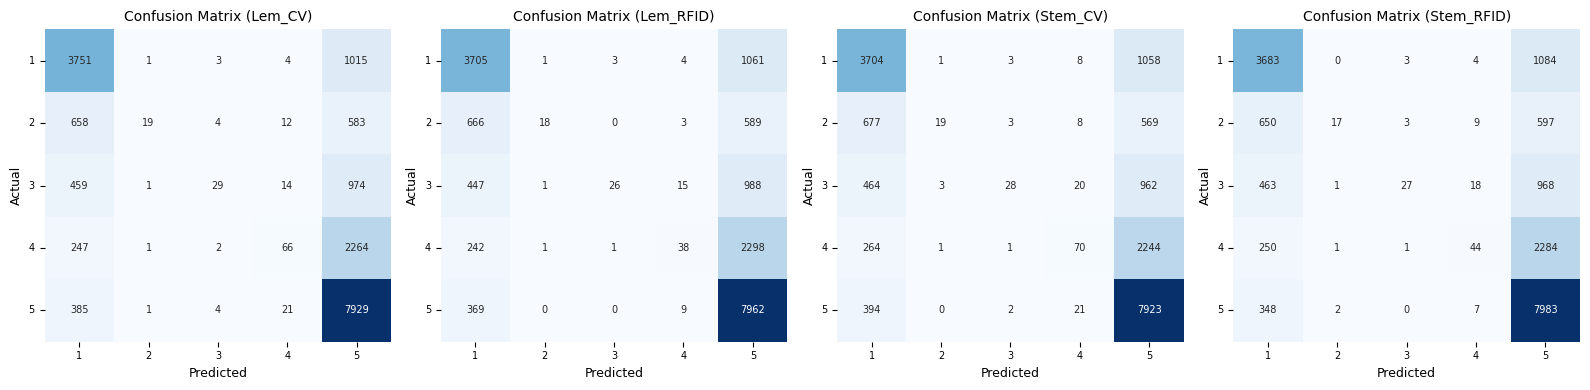

Lem_CV: Train Accuracy - 0.9988, Test Accuracy - 0.6393
Lem_TFIDF: Train Accuracy - 0.9988, Test Accuracy - 0.6369
Stem_CV: Train Accuracy - 0.9987, Test Accuracy - 0.6366
Stem_TFIDF: Train Accuracy - 0.9987, Test Accuracy - 0.6372


In [38]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_rf_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_rf_lem_cv, 'Test': accuracy_test_rf_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_rf_lem_rfid, 'Test': accuracy_test_rf_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_rf_stem_cv, 'Test': accuracy_test_rf_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_rf_stem_rfid, 'Test': accuracy_test_rf_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 6. Naive Bayes

In [39]:
# a) Naive Bayes on Lemmatized CountVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_lem_CV_train, y_train)
y_pred_train_nb_lem_cv = nb_model.predict(X_lem_CV_train)
y_pred_test_nb_lem_cv = nb_model.predict(X_lem_CV_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_lem_cv)
nb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_lem_cv)
accuracy_train_nb_lem_cv = accuracy_score(y_train, y_pred_train_nb_lem_cv)
accuracy_test_nb_lem_cv = accuracy_score(y_test, y_pred_test_nb_lem_cv)

# Print results
print("Naive Bayes - Classification Report: Train Data (lem_cv):\n", nb_report_train_lem_cv_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (lem_cv):\n", nb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_nb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_nb_lem_cv)

Naive Bayes - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.70      0.81      0.88      0.75      0.84      0.70     11494
          2       0.79      0.18      1.00      0.29      0.42      0.16      2977
          3       0.66      0.27      0.99      0.38      0.51      0.25      3332
          4       0.56      0.37      0.95      0.45      0.60      0.34      5784
          5       0.73      0.90      0.72      0.80      0.80      0.66     19456

avg / total       0.70      0.70      0.83      0.67      0.74      0.56     43043


Naive Bayes - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.65      0.76      0.85      0.70      0.81      0.65      4774
          2       0.22      0.02      0.99      0.04      0.15      0.02      1276
          3       0.23      0.06      0.98      

In [40]:
# b) Naive Bayes on Lemmatized TFIDFVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_lem_RFID_train, y_train)
y_pred_train_nb_lem_rfid = nb_model.predict(X_lem_RFID_train)
y_pred_test_nb_lem_rfid = nb_model.predict(X_lem_RFID_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_lem_rfid)
nb_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_lem_rfid)
accuracy_train_nb_lem_rfid = accuracy_score(y_train, y_pred_train_nb_lem_rfid)
accuracy_test_nb_lem_rfid = accuracy_score(y_test, y_pred_test_nb_lem_rfid)

# Print results
print("Naive Bayes - Classification Report: Train Data (lem_tfidf):\n", nb_report_train_lem_rfid_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (lem_tfidf):\n", nb_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_nb_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_nb_lem_rfid)

Naive Bayes - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.82      0.61      0.95      0.70      0.76      0.56     11494
          2       0.00      0.00      1.00      0.00      0.00      0.00      2977
          3       0.33      0.00      1.00      0.00      0.02      0.00      3332
          4       1.00      0.00      1.00      0.00      0.04      0.00      5784
          5       0.56      0.99      0.35      0.71      0.59      0.37     19456

avg / total       0.63      0.61      0.69      0.51      0.48      0.32     43043


Naive Bayes - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.79      0.54      0.95      0.64      0.72      0.49      4774
          2       0.00      0.00      1.00      0.00      0.00      0.00      1276
          3       0.00      0.00      1.00

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# c) Naive Bayes on Stemmatized CountVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_stem_CV_train, y_train)
y_pred_train_nb_stem_cv = nb_model.predict(X_stem_CV_train)
y_pred_test_nb_stem_cv = nb_model.predict(X_stem_CV_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_stem_cv)
nb_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_stem_cv)
accuracy_train_nb_stem_cv = accuracy_score(y_train, y_pred_train_nb_stem_cv)
accuracy_test_nb_stem_cv = accuracy_score(y_test, y_pred_test_nb_stem_cv)

# Print results
print("Naive Bayes - Classification Report: Train Data (stem_cv):\n", nb_report_train_stem_cv_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (stem_cv):\n", nb_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_nb_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_nb_stem_cv)

Naive Bayes - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.69      0.79      0.87      0.74      0.83      0.68     11494
          2       0.69      0.16      0.99      0.26      0.40      0.15      2977
          3       0.57      0.26      0.98      0.36      0.51      0.24      3332
          4       0.52      0.35      0.95      0.42      0.58      0.31      5784
          5       0.72      0.88      0.72      0.79      0.79      0.64     19456

avg / total       0.67      0.69      0.83      0.66      0.72      0.54     43043


Naive Bayes - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.75      0.85      0.69      0.80      0.63      4774
          2       0.20      0.03      0.99      0.05      0.16      0.02      1276
          3       0.24      0.08      0.98    

In [42]:
# d) Naive Bayes on Lemmatized TFIDFVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_stem_RFID_train, y_train)
y_pred_train_nb_stem_rfid = nb_model.predict(X_stem_RFID_train)
y_pred_test_nb_stem_rfid = nb_model.predict(X_stem_RFID_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_stem_rfid)
nb_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_stem_rfid)
accuracy_train_nb_stem_rfid = accuracy_score(y_train, y_pred_train_nb_stem_rfid)
accuracy_test_nb_stem_rfid = accuracy_score(y_test, y_pred_test_nb_stem_rfid)

# Print results
print("Naive Bayes - Classification Report: Train Data (stem_tfidf):\n", nb_report_train_stem_rfid_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (stem_tfidf):\n", nb_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_nb_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_nb_stem_rfid)

Naive Bayes - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.81      0.60      0.95      0.69      0.75      0.55     11494
          2       0.00      0.00      1.00      0.00      0.00      0.00      2977
          3       0.33      0.00      1.00      0.00      0.02      0.00      3332
          4       0.93      0.00      1.00      0.00      0.05      0.00      5784
          5       0.56      0.99      0.35      0.71      0.59      0.37     19456

avg / total       0.62      0.61      0.69      0.51      0.47      0.31     43043


Naive Bayes - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.78      0.54      0.95      0.64      0.72      0.49      4774
          2       0.00      0.00      1.00      0.00      0.00      0.00      1276
          3       0.00      0.00      1.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Summary - Naive Bayes

In [43]:
# a) Lemmatized CountVectorized data
nb_report_train_lem_cv_imbalanced_last = [accuracy_train_nb_lem_cv*100] + [float(value) for value in nb_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
nb_report_test_lem_cv_imbalanced_last = [accuracy_test_nb_lem_cv*100] + [float(value) for value in nb_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_lem_cv_imbalanced = pd.DataFrame([nb_report_train_lem_cv_imbalanced_last, nb_report_test_lem_cv_imbalanced_last], columns=column_names)
final_nb_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_nb_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_nb_report_lem_cv_imbalanced = final_nb_report_lem_cv_imbalanced[['Train/Test'] + column_names]

# b) Lemmatized TFIDFVectorized data
nb_report_train_lem_rfid_imbalanced_last = [accuracy_train_nb_lem_rfid*100] + [float(value) for value in nb_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_lem_rfid_imbalanced_last = [accuracy_test_nb_lem_rfid*100] + [float(value) for value in nb_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_lem_rfid_imbalanced = pd.DataFrame([nb_report_train_lem_rfid_imbalanced_last, nb_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_nb_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_nb_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_nb_report_lem_rfid_imbalanced = final_nb_report_lem_rfid_imbalanced[['Train/Test'] + column_names]

# c) Stemmatized CountVectorized data
nb_report_train_stem_cv_imbalanced_last = [accuracy_train_nb_stem_cv*100] + [float(value) for value in nb_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_stem_cv_imbalanced_last = [accuracy_test_nb_stem_cv*100] + [float(value) for value in nb_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_stem_cv_imbalanced = pd.DataFrame([nb_report_train_stem_cv_imbalanced_last, nb_report_test_stem_cv_imbalanced_last], columns=column_names)
final_nb_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_nb_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_nb_report_stem_cv_imbalanced = final_nb_report_stem_cv_imbalanced[['Train/Test'] + column_names]

# d) Stemmatized TFIDFVectorized data
nb_report_train_stem_rfid_imbalanced_last = [accuracy_train_nb_stem_rfid*100]+ [float(value) for value in nb_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_stem_rfid_imbalanced_last = [accuracy_test_nb_stem_rfid*100] + [float(value) for value in nb_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_stem_rfid_imbalanced = pd.DataFrame([nb_report_train_stem_rfid_imbalanced_last, nb_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_nb_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_nb_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_nb_report_stem_rfid_imbalanced = final_nb_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Naive Bayes

In [44]:
final_nb_report = pd.concat([final_nb_report_lem_cv_imbalanced,
                    final_nb_report_lem_rfid_imbalanced,
                    final_nb_report_stem_cv_imbalanced,
                    final_nb_report_stem_rfid_imbalanced])

final_nb_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,70.387752,0.70,0.70,0.83,0.67,0.74,0.56,43043.0
Lemmatized Count Vectorized,Test,62.844907,0.56,0.63,0.80,0.58,0.65,0.47,18447.0
Lemmatized TFIDF Vectorized,Train,60.964617,0.63,0.61,0.69,0.51,0.48,0.32,43043.0
Lemmatized TFIDF Vectorized,Test,58.584052,0.45,0.59,0.68,0.48,0.44,0.28,18447.0
Stemmatized Count Vectorized,Train,68.570964,0.67,0.69,0.83,0.66,0.72,0.54,43043.0
Stemmatized Count Vectorized,Test,62.031767,0.56,0.62,0.80,0.57,0.65,0.46,18447.0
Stemmatized TFIDF Vectorized,Train,60.616128,0.62,0.61,0.69,0.51,0.47,0.31,43043.0
Stemmatized TFIDF Vectorized,Test,58.513579,0.45,0.59,0.68,0.48,0.44,0.28,18447.0


### Confusion Matrix for Naive Bayes

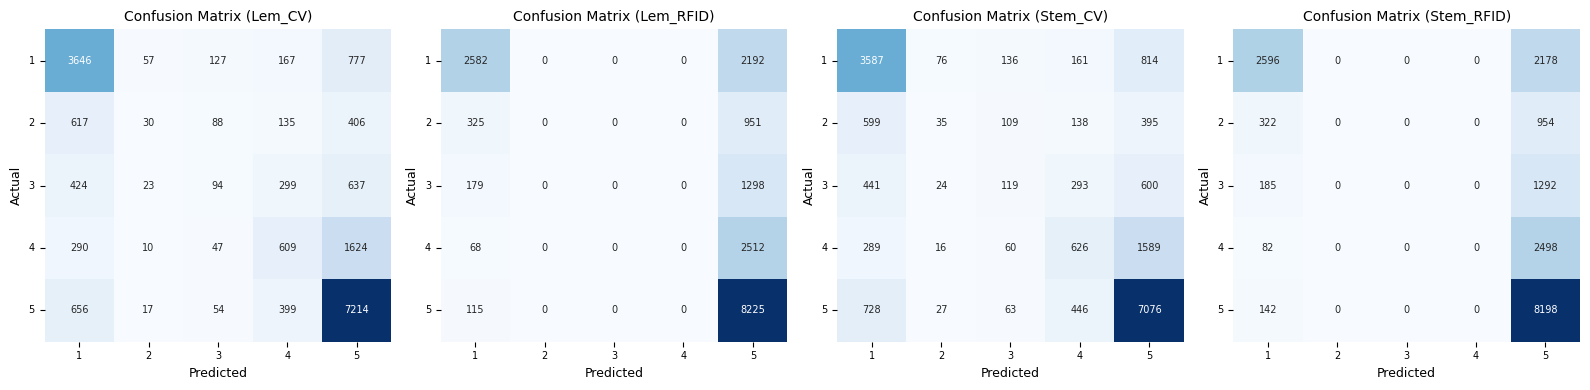

Lem_CV: Train Accuracy - 0.7039, Test Accuracy - 0.6284
Stem_CV: Train Accuracy - 0.6857, Test Accuracy - 0.6203
Lem_TFIDF: Train Accuracy - 0.6096, Test Accuracy - 0.5858
Stem_TFIDF: Train Accuracy - 0.6062, Test Accuracy - 0.5851


In [45]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_nb_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_nb_lem_cv, 'Test': accuracy_test_nb_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_nb_lem_rfid, 'Test': accuracy_test_nb_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_nb_stem_cv, 'Test': accuracy_test_nb_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_nb_stem_rfid, 'Test': accuracy_test_nb_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 7. Gradient Boosting Classifier

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [47]:
# a) XGBoost on Lemmatized CountVectorized data

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_lem_CV_train, y_train_encoded)
y_pred_train_xgb_lem_cv = xgb_model.predict(X_lem_CV_train)
y_pred_test_xgb_lem_cv = xgb_model.predict(X_lem_CV_test)

# XGBoost classification reports and accuracy scores
xgb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_xgb_lem_cv)
xgb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_xgb_lem_cv)
accuracy_train_xgb_lem_cv = accuracy_score(y_train, y_pred_train_xgb_lem_cv)
accuracy_test_xgb_lem_cv = accuracy_score(y_test, y_pred_test_xgb_lem_cv)

# Print results
print("XGBoost - Classification Report: Train Data (lem_cv):\n", xgb_report_train_lem_cv_imbalanced)
print("\nXGBoost - Classification Report: Test Data (lem_cv):\n", xgb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_xgb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_xgb_lem_cv)

XGBoost - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.70      0.00      0.00      0.00         0
          1       0.01      0.00      0.97      0.00      0.02      0.00     11494
          2       0.02      0.01      0.97      0.01      0.09      0.01      2977
          3       0.06      0.05      0.93      0.05      0.21      0.04      3332
          4       0.12      0.51      0.41      0.19      0.46      0.21      5784
          5       0.00      0.00      1.00      0.00      0.00      0.00     19456

avg / total       0.02      0.07      0.91      0.03      0.09      0.03     43043


XGBoost - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.69      0.00      0.00      0.00         0
          1       0.32      0.01      0.99      0.02    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [48]:
# TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

# Convert sparse matrix to dense array
X_lem_CV_train_dense = X_lem_CV_train.toarray()
X_lem_CV_test_dense = X_lem_CV_test.toarray()
X_lem_RFID_train_dense = X_lem_RFID_train.toarray()
X_lem_RFID_test_dense = X_lem_RFID_test.toarray()
X_stem_CV_train_dense = X_stem_CV_train.toarray()
X_stem_CV_test_dense = X_stem_CV_test.toarray()
X_stem_RFID_train_dense = X_stem_RFID_train.toarray()
X_stem_RFID_test_dense = X_stem_RFID_test.toarray()

In [49]:
# a) HistGradientBoosting Classifier on Lemmatized CountVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_lem_CV_train_dense, y_train)
y_pred_train_hist_gb_lem_cv = hist_gb_model.predict(X_lem_CV_train_dense)
y_pred_test_hist_gb_lem_cv = hist_gb_model.predict(X_lem_CV_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_lem_cv)
hist_gb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_lem_cv)
accuracy_train_hist_gb_lem_cv = accuracy_score(y_train, y_pred_train_hist_gb_lem_cv)
accuracy_test_hist_gb_lem_cv = accuracy_score(y_test, y_pred_test_hist_gb_lem_cv)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (lem_cv):\n", hist_gb_report_train_lem_cv_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (lem_cv):\n", hist_gb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_hist_gb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_hist_gb_lem_cv)

HistGradientBoosting - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.87      0.89      0.81      0.88      0.78     11494
          2       0.93      0.30      1.00      0.45      0.55      0.28      2977
          3       0.84      0.34      0.99      0.48      0.58      0.32      3332
          4       0.70      0.39      0.97      0.50      0.62      0.36      5784
          5       0.75      0.93      0.75      0.83      0.84      0.71     19456

avg / total       0.77      0.76      0.85      0.73      0.78      0.62     43043


HistGradientBoosting - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.82      0.86      0.74      0.84      0.70      4774
          2       0.29      0.04      0.99      0.07      0.20      0.04      1276
          3       0.36      0.

In [50]:
# b) HistGradientBoosting Classifier on Lemmatized TFIDFVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_lem_RFID_train_dense, y_train)
y_pred_train_hist_gb_lem_rfid = hist_gb_model.predict(X_lem_RFID_train_dense)
y_pred_test_hist_gb_lem_rfid = hist_gb_model.predict(X_lem_RFID_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_lem_rfid)
hist_gb_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_lem_rfid)
accuracy_train_hist_gb_lem_rfid = accuracy_score(y_train, y_pred_train_hist_gb_lem_rfid)
accuracy_test_hist_gb_lem_rfid = accuracy_score(y_test, y_pred_test_hist_gb_lem_rfid)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (lem_tfidf):\n", hist_gb_report_train_lem_rfid_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (lem_tfidf):\n", hist_gb_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_hist_gb_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_hist_gb_lem_rfid)

HistGradientBoosting - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.89      0.90      0.82      0.89      0.80     11494
          2       0.94      0.34      1.00      0.50      0.58      0.32      2977
          3       0.87      0.39      0.99      0.54      0.63      0.37      3332
          4       0.75      0.43      0.98      0.55      0.65      0.40      5784
          5       0.77      0.94      0.77      0.85      0.85      0.74     19456

avg / total       0.78      0.77      0.87      0.75      0.80      0.65     43043


HistGradientBoosting - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.82      0.86      0.74      0.84      0.70      4774
          2       0.28      0.04      0.99      0.07      0.20      0.04      1276
          3       0.35  

In [51]:
# c) HistGradientBoosting Classifier on Stemmatized CountVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_stem_CV_train_dense, y_train)
y_pred_train_hist_gb_stem_cv = hist_gb_model.predict(X_stem_CV_train_dense)
y_pred_test_hist_gb_stem_cv = hist_gb_model.predict(X_stem_CV_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_stem_cv)
hist_gb_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_stem_cv)
accuracy_train_hist_gb_stem_cv = accuracy_score(y_train, y_pred_train_hist_gb_stem_cv)
accuracy_test_hist_gb_stem_cv = accuracy_score(y_test, y_pred_test_hist_gb_stem_cv)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (stem_cv):\n", hist_gb_report_train_stem_cv_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (stem_cv):\n", hist_gb_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_hist_gb_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_hist_gb_stem_cv)

HistGradientBoosting - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.87      0.89      0.80      0.88      0.77     11494
          2       0.92      0.30      1.00      0.45      0.55      0.28      2977
          3       0.84      0.33      0.99      0.48      0.57      0.31      3332
          4       0.71      0.40      0.97      0.51      0.63      0.37      5784
          5       0.75      0.93      0.75      0.83      0.83      0.71     19456

avg / total       0.76      0.75      0.85      0.73      0.78      0.62     43043


HistGradientBoosting - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.81      0.86      0.73      0.83      0.69      4774
          2       0.31      0.05      0.99      0.09      0.22      0.04      1276
          3       0.38      

In [52]:
# d) HistGradientBoosting Classifier on Stemmatized TFIDFVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_stem_RFID_train_dense, y_train)
y_pred_train_hist_gb_stem_rfid = hist_gb_model.predict(X_stem_RFID_train_dense)
y_pred_test_hist_gb_stem_rfid = hist_gb_model.predict(X_stem_RFID_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_stem_rfid)
hist_gb_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_stem_rfid)
accuracy_train_hist_gb_stem_rfid = accuracy_score(y_train, y_pred_train_hist_gb_stem_rfid)
accuracy_test_hist_gb_stem_rfid = accuracy_score(y_test, y_pred_test_hist_gb_stem_rfid)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (stem_tfidf):\n", hist_gb_report_train_stem_rfid_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (stem_tfidf):\n", hist_gb_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_hist_gb_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_hist_gb_stem_rfid)

HistGradientBoosting - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.88      0.90      0.82      0.89      0.79     11494
          2       0.93      0.35      1.00      0.50      0.59      0.32      2977
          3       0.85      0.40      0.99      0.54      0.63      0.37      3332
          4       0.75      0.44      0.98      0.55      0.65      0.40      5784
          5       0.77      0.94      0.77      0.85      0.85      0.73     19456

avg / total       0.78      0.77      0.87      0.75      0.80      0.65     43043


HistGradientBoosting - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.66      0.81      0.86      0.73      0.83      0.69      4774
          2       0.25      0.04      0.99      0.07      0.20      0.04      1276
          3       0.38

## Summary - Gradient Boosting

In [53]:
# a) Lemmatized CountVectorized data
hist_gb_report_train_lem_cv_imbalanced_last = [accuracy_train_hist_gb_lem_cv * 100] + [float(value) for value in hist_gb_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_lem_cv_imbalanced_last = [accuracy_test_hist_gb_lem_cv * 100] + [float(value) for value in hist_gb_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_lem_cv_imbalanced = pd.DataFrame([hist_gb_report_train_lem_cv_imbalanced_last, hist_gb_report_test_lem_cv_imbalanced_last], columns=column_names)
final_hist_gb_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_hist_gb_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_lem_cv_imbalanced = final_hist_gb_report_lem_cv_imbalanced[['Train/Test'] + column_names]

# b) Lemmatized TFIDFVectorized data
hist_gb_report_train_lem_rfid_imbalanced_last = [accuracy_train_hist_gb_lem_rfid * 100] + [float(value) for value in hist_gb_report_train_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_lem_rfid_imbalanced_last = [accuracy_test_hist_gb_lem_rfid * 100] + [float(value) for value in hist_gb_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_lem_rfid_imbalanced = pd.DataFrame([hist_gb_report_train_lem_rfid_imbalanced_last, hist_gb_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_hist_gb_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_hist_gb_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_lem_rfid_imbalanced = final_hist_gb_report_lem_rfid_imbalanced[['Train/Test'] + column_names]

# c) Stemmatized CountVectorized data
hist_gb_report_train_stem_cv_imbalanced_last = [accuracy_train_hist_gb_stem_cv * 100] + [float(value) for value in hist_gb_report_train_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_stem_cv_imbalanced_last = [accuracy_test_hist_gb_stem_cv * 100] + [float(value) for value in hist_gb_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_stem_cv_imbalanced = pd.DataFrame([hist_gb_report_train_stem_cv_imbalanced_last, hist_gb_report_test_stem_cv_imbalanced_last], columns=column_names)
final_hist_gb_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_hist_gb_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_stem_cv_imbalanced = final_hist_gb_report_stem_cv_imbalanced[['Train/Test'] + column_names]

# d) Stemmatized TFIDFVectorized data
hist_gb_report_train_stem_rfid_imbalanced_last = [accuracy_train_hist_gb_stem_rfid * 100] + [float(value) for value in hist_gb_report_train_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_stem_rfid_imbalanced_last = [accuracy_test_hist_gb_stem_rfid * 100] + [float(value) for value in hist_gb_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_stem_rfid_imbalanced = pd.DataFrame([hist_gb_report_train_stem_rfid_imbalanced_last, hist_gb_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_hist_gb_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_hist_gb_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_stem_rfid_imbalanced = final_hist_gb_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Histogram Gradient Boosting Classifier

In [54]:
final_hist_gb_report = pd.concat([final_hist_gb_report_lem_cv_imbalanced,
                    final_hist_gb_report_lem_rfid_imbalanced,
                    final_hist_gb_report_stem_cv_imbalanced,
                    final_hist_gb_report_stem_rfid_imbalanced])

final_hist_gb_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,75.547708,0.77,0.76,0.85,0.73,0.78,0.62,43043.0
Lemmatized Count Vectorized,Test,66.113731,0.60,0.66,0.81,0.61,0.68,0.50,18447.0
Lemmatized TFIDF Vectorized,Train,77.329647,0.78,0.77,0.87,0.75,0.80,0.65,43043.0
Lemmatized TFIDF Vectorized,Test,65.972787,0.60,0.66,0.81,0.61,0.68,0.50,18447.0
Stemmatized Count Vectorized,Train,75.405989,0.76,0.75,0.85,0.73,0.78,0.62,43043.0
Stemmatized Count Vectorized,Test,65.929419,0.60,0.66,0.81,0.61,0.68,0.50,18447.0
Stemmatized TFIDF Vectorized,Train,77.311061,0.78,0.77,0.87,0.75,0.80,0.65,43043.0
Stemmatized TFIDF Vectorized,Test,66.054101,0.60,0.66,0.82,0.61,0.68,0.51,18447.0


### Confusion Matrix for Histogram Gradient Boosting

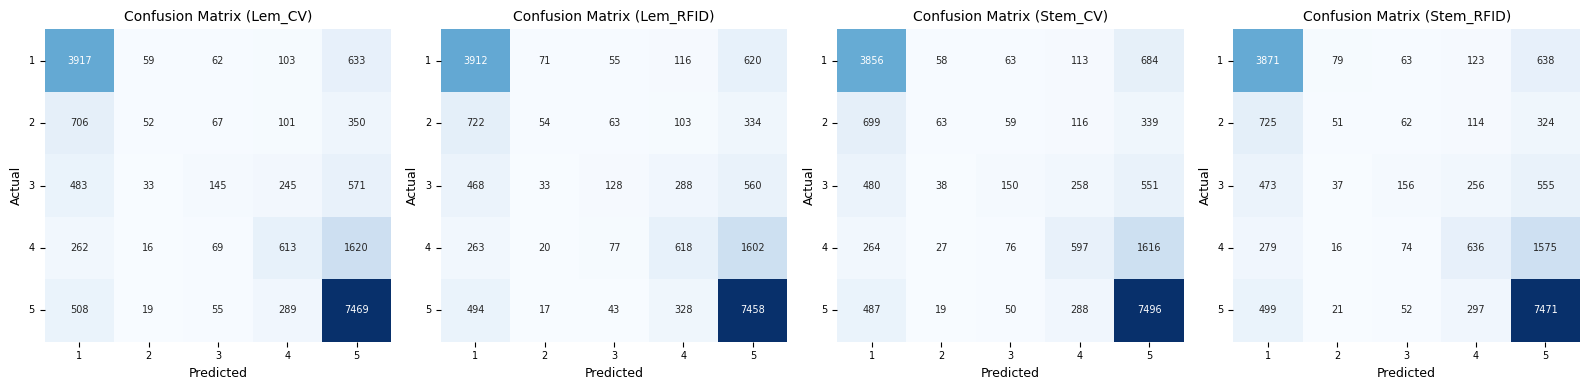

Lem_TFIDF: Train Accuracy - 0.7733, Test Accuracy - 0.6597
Stem_TFIDF: Train Accuracy - 0.7731, Test Accuracy - 0.6605
Lem_CV: Train Accuracy - 0.7555, Test Accuracy - 0.6611
Stem_CV: Train Accuracy - 0.7541, Test Accuracy - 0.6593


In [55]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_hist_gb_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)
    
    # Plotting Confusion Matrix as sns.heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 7},
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7, rotation=0)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_hist_gb_lem_cv, 'Test': accuracy_test_hist_gb_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_hist_gb_lem_rfid, 'Test': accuracy_test_hist_gb_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_hist_gb_stem_cv, 'Test': accuracy_test_hist_gb_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_hist_gb_stem_rfid, 'Test': accuracy_test_hist_gb_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# ---------